In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Mount Google Drive
drive.mount('/content/drive')

# Define project/data paths
project_path = "/content/drive/MyDrive/Heart_Disease_Project"
data_path = os.path.join(project_path, "data")
os.makedirs(data_path, exist_ok=True)

# --- Load PCA dataset ---
df = pd.read_csv(os.path.join(data_path, "pca_heart.csv"))

X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", df.shape)


Mounted at /content/drive
Dataset shape: (303, 13)


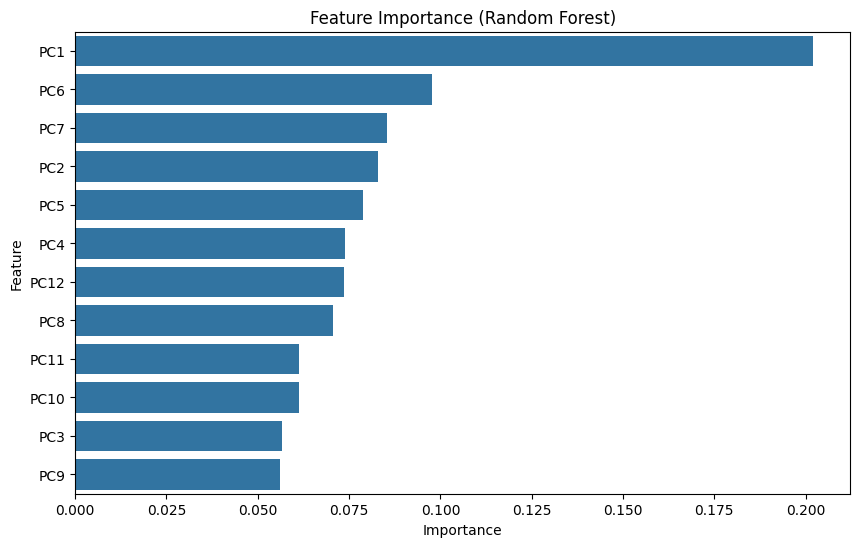

In [2]:
# Train a Random Forest to rank features
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [4]:
model = LogisticRegression(max_iter=1000, solver="liblinear")
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_].tolist()
print("RFE selected features:", selected_features_rfe)

RFE selected features: ['PC1', 'PC6', 'PC7', 'PC9', 'PC12']


In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X_scaled, y)

selected_features_chi2 = X.columns[chi2_selector.get_support()].tolist()
print("Chi-Square selected features:", selected_features_chi2)


Chi-Square selected features: ['PC1', 'PC2', 'PC4', 'PC6', 'PC7']


In [6]:
final_selected_features = list(set(selected_features_rfe + selected_features_chi2))
print("Final selected features:", final_selected_features)


reduced_df = df[final_selected_features + ["target"]]
print("Reduced dataset shape:", reduced_df.shape)


reduced_path = os.path.join(data_path, "selected_features_heart.csv")
reduced_df.to_csv(reduced_path, index=False)

print("Reduced dataset saved at", reduced_path)


Final selected features: ['PC2', 'PC6', 'PC12', 'PC1', 'PC7', 'PC4', 'PC9']
Reduced dataset shape: (303, 8)
Reduced dataset saved at /content/drive/MyDrive/Heart_Disease_Project/data/selected_features_heart.csv
